## Opening the Annualized Climate Data

Now, we'll open up the climate data that has already been aggregated from monthly to annual values:

In [9]:

import numpy as np
import glob
import datetime
from datetime import date
from datetime import timedelta
# import datetime
# from dateutil.relativedelta import relativedelta
# from datetime import datetime
# import pandas as pd
import os
from netCDF4 import Dataset
import netCDF4 as nc
import xarray as xr
# from osgeo import gdal
# import geopandas as gpd
# from shapely.geometry import MultiPolygon, Polygon, Point
# from scipy import io
import pandas as pd

from datetime import date
from datetime import timedelta
import datetime

#reference grid
f = 0

file = 'Class_data.nc'





fhadj = Dataset(file, mode='r')
variable_data_A = fhadj.variables['A'][:]
variable_data_B = fhadj.variables['B'][:]
variable_data_C = fhadj.variables['C'][:]
variable_data_D = fhadj.variables['D'][:]
variable_data_E = fhadj.variables['E'][:]
variable_data_F = fhadj.variables['F'][:]
print(fhadj.variables.keys())

fhadj.close()




dict_keys(['time', 'A', 'B', 'C', 'D', 'E', 'F'])


In [10]:
import numpy as np

# Sample data (replace with your actual data)
data = variable_data_A

# Calculate Q1 and Q3
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

print("First Quartile (Q1):", Q1)
print("Third Quartile (Q3):", Q3)
print("Interquartile Range (IQR):", IQR)
print("Lower Bound:", lower_bound)


First Quartile (Q1): 0.0
Third Quartile (Q3): 2.7853899002075195
Interquartile Range (IQR): 2.7853899002075195
Lower Bound: -4.178084850311279


/Users/maloyd1/miniforge3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


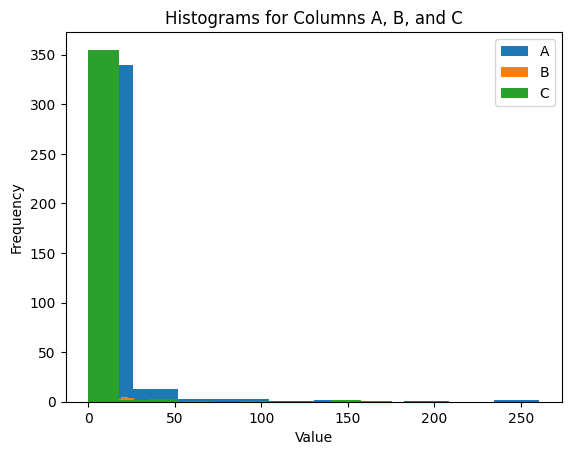

In [11]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    "A": variable_data_A,
    "B": variable_data_B,
    "C": variable_data_C
}

# Plot histograms for columns A, B, and C
for column in data.keys():
    plt.hist(data[column], bins=10, alpha=1, label=column)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histograms for Columns A, B, and C")
plt.legend()


In [12]:
import pandas as pd
import numpy as np

# Sample data (replace with your actual time series data)
data = {
    'A': variable_data_A,
    'B': variable_data_B,
    'C': variable_data_C,
    'D': variable_data_D,
    'E': variable_data_E,
    'F': variable_data_F
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate the correlations between A and B-F
correlations = df.corr().loc['A', 'B':'F']

print("Correlations between A and B-F:")
print(correlations)



Correlations between A and B-F:
B   -0.027192
C   -0.031546
D   -0.019519
E   -0.032380
F    0.009236
Name: A, dtype: float64


In [13]:
import pandas as pd
import numpy as np

# Sample data (replace with your actual time series data)
data = {
    'A': variable_data_A,
    'B': variable_data_B,
    'C': variable_data_C,
    'D': variable_data_D,
    'E': variable_data_E,
    'F': variable_data_F
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate the correlations between A and B-F
correlations = df.corr(method = 'kendall').loc['A', 'B':'F']

print("Correlations between Kendall A and B-F:")
print(correlations)


Correlations between Kendall A and B-F:
B    0.038927
C   -0.069099
D   -0.037871
E    0.076266
F    0.016815
Name: A, dtype: float64


In [14]:
import pandas as pd
import numpy as np

# Sample data (replace with your actual time series data)
data = {
    'A': variable_data_A,
    'B': variable_data_B,
    'C': variable_data_C,
    'D': variable_data_D,
    'E': variable_data_E,
    'F': variable_data_F
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate the correlations between A and B-F
correlations = df.corr(method = 'spearman').loc['A', 'B':'F']

print("Correlations between spearman A and B-F:")
print(correlations)


Correlations between spearman A and B-F:
B    0.053904
C   -0.098026
D   -0.048534
E    0.098064
F    0.021040
Name: A, dtype: float64


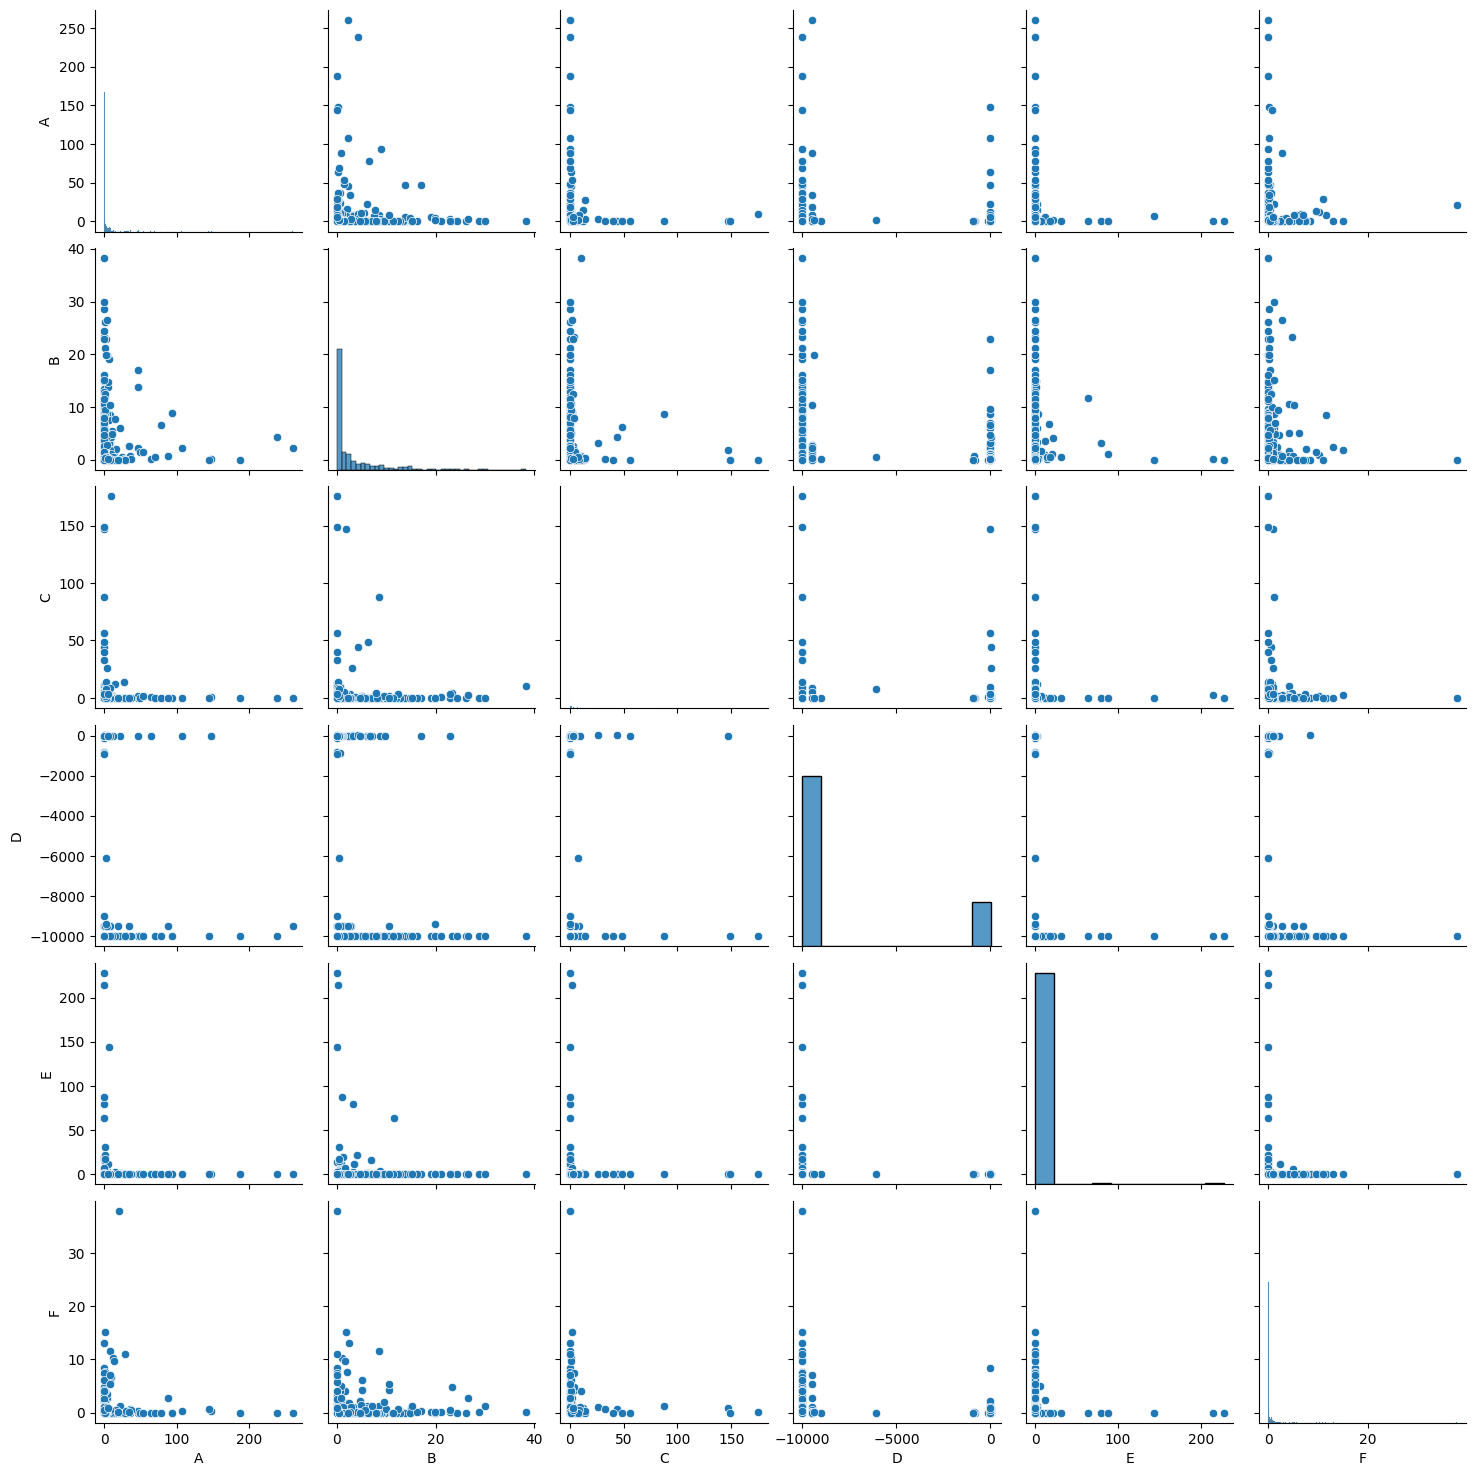

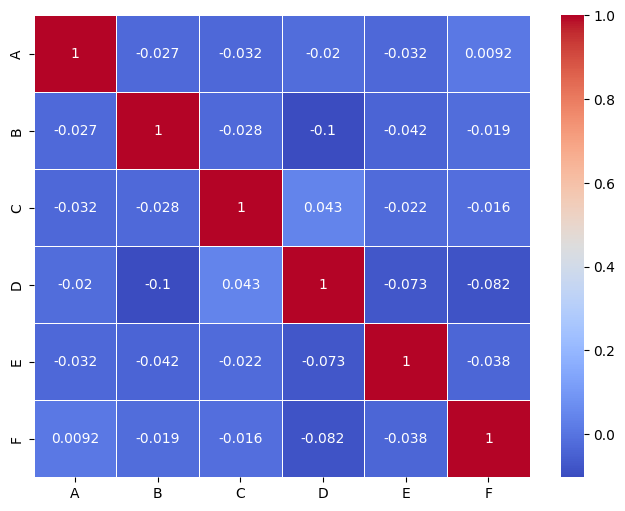

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    'A': variable_data_A,
    'B': variable_data_B,
    'C': variable_data_C,
    'D': variable_data_D,
    'E': variable_data_E,
    'F': variable_data_F
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Scatterplot matrix
sns.pairplot(df)
plt.show()

# Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
